# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Ilana L. 9077
# (if exists)           student details 2: 
# (if exists)           student details 3: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

The assignment focuses on the supervised classification in machine learning.
* We aim to predict the category of samples based on given features.
* In this assignment, we use the wine dataset, which includes 13 chemical attributes of wine, and a target that represents one of 3 wine types (0,1 or 2).
* The assignment involves performing preprocessing, feature engineering, training models and tuning hyperparameters using 5 fold cross validation.
* And finally we predict classes on the pre split test set while evaluating model performance with the macro average F1 score.

#### Add information in this Markdown cell (double click to change, shift-enter to view)


## Part 2 - Initial Preparations 
You could add as many code cells as needed

### Loading:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# Loading the dataset's train and test data::
path = "./wine_train.csv"
train_data = pd.read_csv(path)

path = "./wine_test.csv"
test_data = pd.read_csv(path)

# Display 5 first elements of train and test
display(train_data.head(5))
display(test_data.head(5))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


### EDA:

#### Display wine dataset correlations and plot a scatterplot between two columns with positive correlation

In [5]:
display(train_data.corr())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


##### We can see that Alcohol and Proline has a positive correlation, lets show it in a scatterplot:

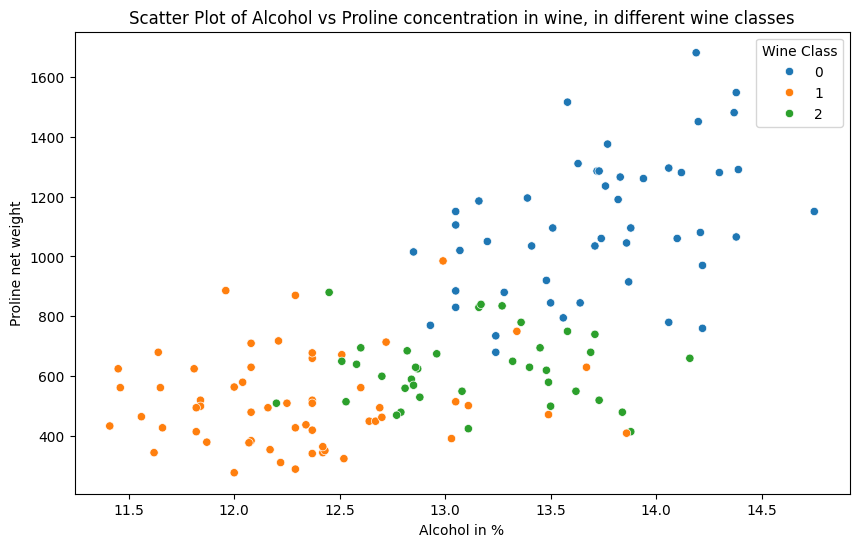

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='proline', hue='target', data=train_data, palette='tab10')
plt.title('Scatter Plot of Alcohol vs Proline concentration in wine, in different wine classes')
plt.xlabel('Alcohol in %')
plt.ylabel('Proline net weight')
plt.legend(title = 'Wine Class')
plt.show()

##### We can see that the alcohol percentage in wine usually indicates a different wine class

#### General info about the dataset

In [8]:
display(train_data.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


##### We can see that the alcohol concentration is distributed between 11.41% to 14.75%, lets make a histogram with the alcohol's distribution:

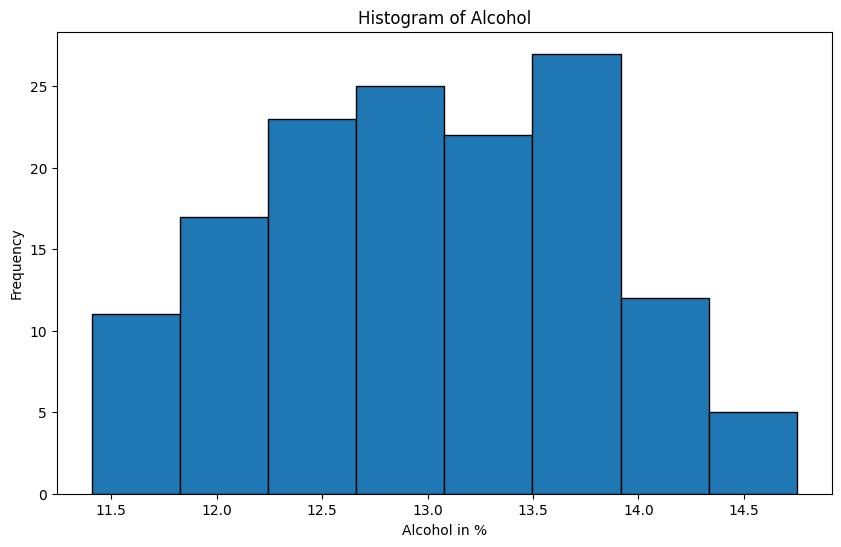

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['alcohol'], bins=8, edgecolor='black')
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol in %')
plt.ylabel('Frequency')
plt.show()

##### It's easy to see that most of the wine's alcohol percentage is around 13%

### Feature Engineering:

#### Principal Component Analysis on wine dataset while using scaled VS non scaled data

##### Separate features and target

In [10]:
features = train_data.drop('target', axis=1)
target = train_data['target']

##### Standardize the data

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##### Perform PCA on scaled and non scaled features

In [12]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(features)
principal_components_scaled = pca.fit_transform(scaled_features)

##### Create a DataFrame with the scaled and non scaled principal components for comparison

In [13]:
# Non Scaled:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = target
# Scaled:
pca_scaled_df = pd.DataFrame(data=principal_components_scaled, columns=['PC1', 'PC2'])
pca_scaled_df['target'] = target

##### Plot the scaled and non scaled analysis

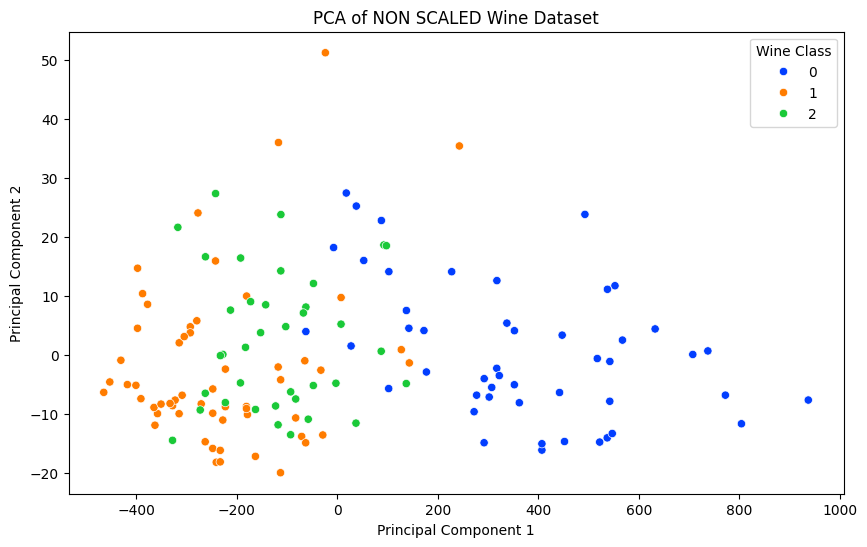

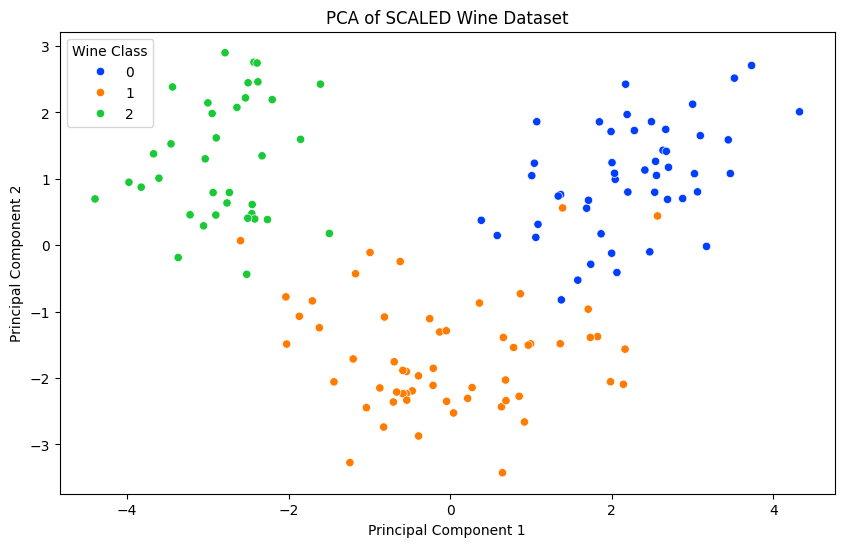

In [14]:
# PCA non scaled scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='bright')
plt.title('PCA of NON SCALED Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Wine Class')
plt.show()

# PCA scaled scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_scaled_df, palette='bright')
plt.title('PCA of SCALED Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Wine Class')
plt.show()

##### We can see that the scaled information is separated mostly evenly between 3 of the wine classes (the target) in the SCALED analysis

## Part 3 - Experiments
You could add as many code cells as needed

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation